# Problem Statement

To predict the Employment rate in Wisconsin.

## Data

- Monthly Milk Production in US (Pounds per cow) vs Employment rate in Wisconsin (In Thousands)

#### Reading the Data

In [1]:
data <- read.csv(file="data.csv")

#### Data Understanding

In [2]:
head(data)
tail(data)

summary(data)

,Year_Month,Milk_Production,Wisconsin_Employment_Rate
,<chr>,<int>,<dbl>
1,1962-01,589,237.6
2,1962-02,561,235.7
3,1962-03,640,236.1
4,1962-04,656,242.6
5,1962-05,727,244.5
6,1962-06,697,246.6


,Year_Month,Milk_Production,Wisconsin_Employment_Rate
,<chr>,<int>,<dbl>
161,1975-05,966,389.9
162,1975-06,937,394.6
163,1975-07,896,394.0
164,1975-08,858,397.0
165,1975-09,817,397.2
166,1975-10,827,399.4


  Year_Month        Milk_Production Wisconsin_Employment_Rate
 Length:166         Min.   :553.0   Min.   :235.7            
 Class :character   1st Qu.:677.2   1st Qu.:273.9            
 Mode  :character   Median :758.0   Median :313.1            
                    Mean   :753.9   Mean   :312.1            
                    3rd Qu.:823.2   3rd Qu.:345.0            
                    Max.   :969.0   Max.   :399.4            

### Building a Simple Linear Regression model with Employment Rate ( target ) and Milk Production

In [3]:
lr <- lm(Wisconsin_Employment_Rate ~ Milk_Production, data)

summary(lr)


Call:
lm(formula = Wisconsin_Employment_Rate ~ Milk_Production, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-59.242 -20.343  -0.356  20.483  73.143 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     57.10618   16.70672   3.418 0.000795 ***
Milk_Production  0.33823    0.02196  15.403  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.92 on 164 degrees of freedom
Multiple R-squared:  0.5913,	Adjusted R-squared:  0.5888 
F-statistic: 237.2 on 1 and 164 DF,  p-value: < 2.2e-16


### Understanding the model

- We can observe a decent $R^2$
- p-value is low for Milk_Production attribute.


#### Something look fishy, because target and indepedent attribute(s) are not logically related, but model is showing otherwise.

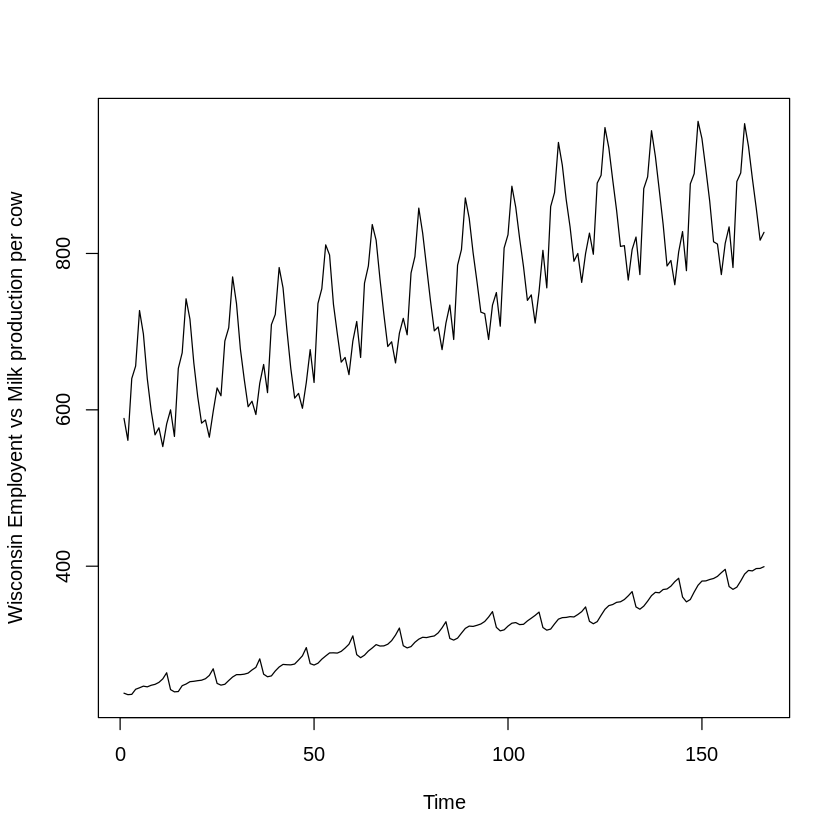

In [4]:
ts.plot(as.ts(data$Wisconsin_Employment_Rate), as.ts(data$Milk_Production),
        ylab = "Wisconsin Employent vs Milk production per cow")

In [5]:
cor(data$Wisconsin_Employment_Rate, data$Milk_Production)

[1] 0.7689446

# Spurious Regression

- Certainly, there is correlation between the variables, but there is no causation.

A good SLR result is because of <b>correlation</b> between variables and not because of <b>causation</b>.


### Spurious Regression is a regression that provides misleading statistical evidence of a linear relationship between independent non-stationary variables

- Milk_Data and Emp_Data has a strong trend 
- Any other variable with such a trend will also show larger R^2^
- It shows apparent relationship between two variables but in reality it doesn't exist
- We should stationarise the data and check the results again

#### To check number of differences needed to make the data stationary

In [6]:
library(forecast)

ndiffs(data$Wisconsin_Employment_Rate)

ndiffs(data$Milk_Production)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] 1

[1] 1

In [7]:
lr_diff <- lm( diff(data$Wisconsin_Employment_Rate, lag = 1) ~ diff(data$Milk_Production, lag = 1) )

summary(lr_diff)


Call:
lm(formula = diff(data$Wisconsin_Employment_Rate, lag = 1) ~ 
    diff(data$Milk_Production, lag = 1))

Residuals:
    Min      1Q  Median      3Q     Max 
-25.187  -0.509   1.433   3.693   9.595 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)                         0.968482   0.559706   1.730   0.0855 .
diff(data$Milk_Production, lag = 1) 0.008405   0.012330   0.682   0.4964  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.186 on 163 degrees of freedom
Multiple R-squared:  0.002843,	Adjusted R-squared:  -0.003274 
F-statistic: 0.4648 on 1 and 163 DF,  p-value: 0.4964


In [25]:
x = data$Wisconsin_Employment_Rate[1:165]

In [26]:
nrow(data)

[1] 166

In [27]:
y = data$Wisconsin_Employment_Rate[2:166]

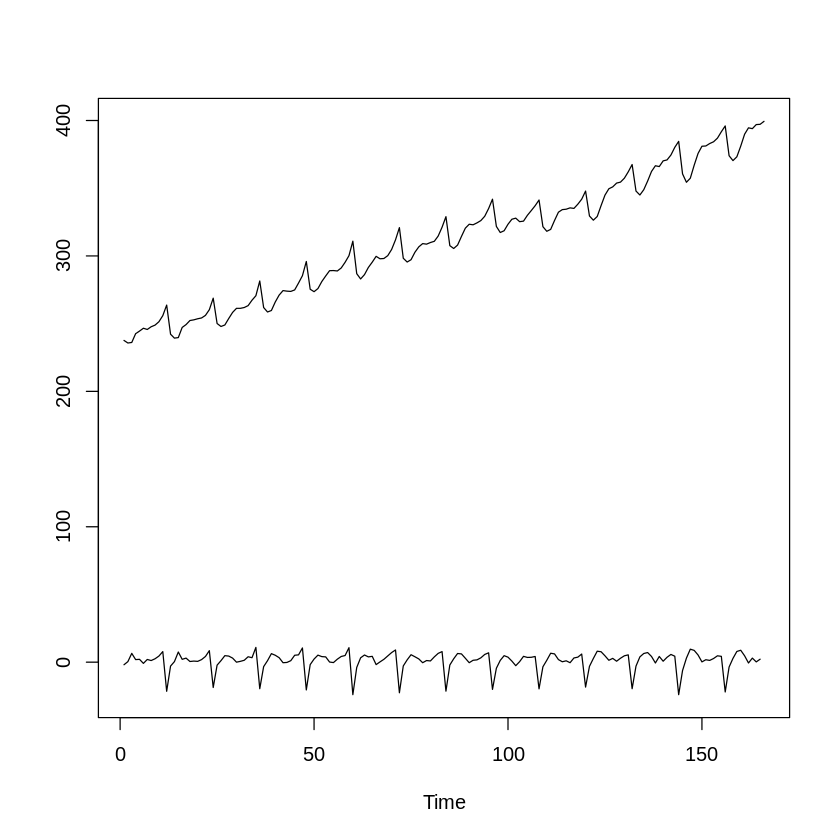

In [33]:
ts.plot(as.ts(data$Wisconsin_Employment_Rate), as.ts(y - x))

In [ ]:
z = y - x


z[1:164]
a = z[2:165]

a - z

In [30]:
diff(data$Wisconsin_Employment_Rate, lag = 1)

[1]  -1.9   0.4   6.5   1.9   2.1  -0.9   2.0   1.2   2.5   4.5   7.8 -21.5
 [13]  -2.9   0.4   7.5   2.1   3.0   0.5   0.8   0.6   1.9   4.2   8.5 -18.7
 [25]  -2.2   1.1   4.8   4.5   3.0   0.0   0.6   1.4   4.0   3.3  10.9 -19.6
 [37]  -3.3   1.1   6.3   5.1   3.3  -0.4  -0.2   1.1   5.1   5.4  10.5 -20.5
 [49]  -1.8   2.3   5.2   4.1   3.9   0.1  -0.3   2.2   4.2   4.9  10.7 -24.0
 [61]  -3.9   3.2   5.3   3.9   4.3  -1.8   0.2   2.1   4.6   7.1   9.0 -22.6
 [73]  -2.8   1.7   5.5   4.0   2.4  -0.4   1.2   0.9   3.9   6.5   7.8 -21.4
 [85]  -2.1   2.5   6.4   6.1   2.9  -0.4   1.4   1.7   3.2   5.7   6.9 -20.1
 [97]  -4.5   1.3   4.8   3.7   0.8  -2.6   0.4   4.3   3.5   3.6   4.2 -19.7
[109]  -3.4   1.4   6.6   6.1   1.9   0.3   1.0  -0.4   3.1   3.7   6.0 -18.4
[121]  -3.1   2.7   8.1   7.7   4.7   1.4   2.8   0.7   2.9   4.7   5.4 -19.6
[133]  -2.9   3.9   6.4   7.1   4.2  -0.6   4.2   0.7   3.6   5.7   4.4 -24.0
[145]  -6.2   3.0   9.6   8.7   5.3   0.2   1.8   1.3   2.7   4.7   4.3 -22.0
[157]  -3.6   2.8   7.9   8.8   4.7  -0.6   3.0   0.2   2.2